In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import GPy
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
np.random.seed(123)

# GPRでゴミ変数の数を増やした場合

In [531]:
P = 100
RMSEs = []
R2s = []


#関数の決定
def func(x):
        y= np.sin(x[0]) + x[1]**2 -x[3] +x[4]**2
        return y
    
for p in range(5,P):      #関数に対応して初めを決める


#トレーニングデータの作成　-1<x<1になっている
    N = 100
    X = []
    Y = []
    for i in range(N):    
        x = 2*np.random.rand(p) -1
        X.append(x)
        y = func(X[i]) + 0.05*np.random.rand(1)
        Y.append(y)

    X1 = np.array(X)   
    Y1 = np.array(Y)   


    
#モデルの構築
    import GPy 
    kern = GPy.kern.RBF(p)
    model = GPy.models.GPRegression(X1 ,Y1 ,kernel = kern)
    model.optimize()


    
#テストデータを作成しつつRMSEの計算
    N = 10
    RMSE = 0
    R = 0
    R_free = 0
    y_list = []
    up = 0
    ave = 0
    down = 0
    for i in range(N):
        x_test = 2*np.random.rand(p) - 1
        y_test= func(x_test) 
        y_list.append(y_test)
        
        y_pred = model.predict_quantiles(x_test.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
        RMSE += (y_pred - y_test)**2
        
        up += (y_test - y_pred)**2
    
    ave = np.array(y_list).sum()/N
    down = ((np.array(y_list) -1)**2).sum()
    R = 1-up/down
    
    R_free = 1 - (up/(N - P -1))/(down/(N-1))
    
    R2s.append(R)
    


    RMSEs.append((RMSE/N)**0.5)

 /anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square


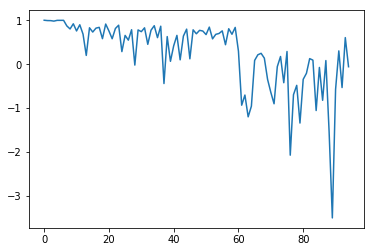

In [533]:
plt.plot(R2s)

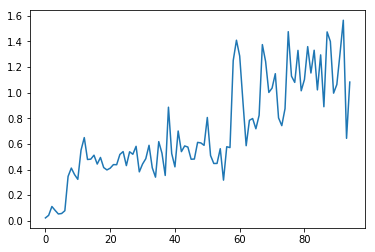

In [466]:
plt.plot(RMSEs)

## 説明変数の数が多すぎるとRMSEは大きくなる

# PLSで変数選択

[[ 7.60723169]
 [-0.08908261]
 [ 4.2336555 ]
 [-0.78364097]
 [ 0.13012228]
 [ 0.49264321]
 [-0.04730758]
 [ 0.29325635]
 [ 0.13391763]
 [-0.11747988]]


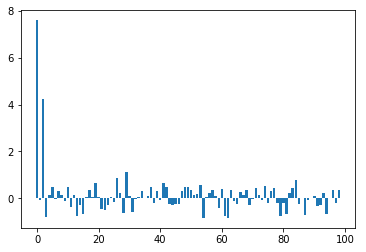

In [500]:
P = 100
RMSEs = []


#関数の決定
def func(x):
        y= 10*x[0] + 5*x[2]
        return y
    
for p in range(4,P):      #関数に対応して初めを決める


#トレーニングデータの作成　-1<x<1になっている
    N = 100
    X = []
    Y = []
    for i in range(N):    
        x = 2*np.random.rand(p) -1
        X.append(x)
        y = func(X[i]) + 0.05*np.random.rand(1)
        Y.append(y)

    X1 = np.array(X)   
    Y1 = np.array(Y)   


    
#モデルの構築
    pls = PLSRegression(n_components=3, scale=False)
    pls.fit(X1, Y1)


    
#テストデータを作成しつつRMSEの計算
    N = 50
    RMSE = 0
    for i in range(N):
        x_test = 2*np.random.rand(p) - 1
        y_test= func(x_test) 
        y_pred = pls.predict(x_test.reshape(1,-1))
        RMSE += (y_pred - y_test)**2

    RMSE = (RMSE/N)**0.5
    RMSEs.append(RMSE)

A = pls.coef_
B = []
for i in range(len(A)):
    B.append(A[i][0])
plt.bar(np.arange(len(B)), B)

print(pls.coef_[:10])

## トレーニングデータが少ないと、PLSでも変数選択は有効

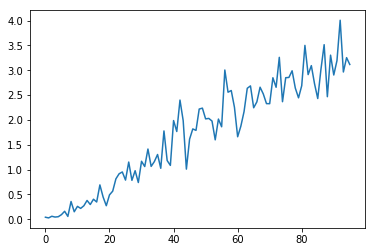

In [490]:
list = []
for i in range(len(RMSEs)):
    list.append(RMSEs[i][0])
    
plt.plot(list)

# サポートベクター回帰の実装

In [495]:
P = 100
RMSEs = []


#関数の決定
def func(x):
        y= np.sin(x[0]) + x[1]**2 -x[3]
        return y
    
for p in range(4,P):      #関数に対応して初めを決める


#トレーニングデータの作成　-1<x<1になっている
    N = 100
    X = []
    Y = []
    for i in range(N):    
        x = 2*np.random.rand(p) -1
        X.append(x)
        y = func(X[i]) + 0.05*np.random.rand(1)
        Y.append(y)

    X1 = np.array(X)   
    Y1 = np.array(Y)   


    
#モデルの構築
    model = svm.SVR(kernel='rbf', C=1e3 , gamma=0.6)
    fitted = model.fit(X1,Y1)

    
#テストデータを作成しつつRMSEの計算
    N = 10
    RMSE = 0
    for i in range(N):
        x_test = 2*np.random.rand(p) - 1
        y_test= func(x_test) 
        y_pred = model.predict(x_test.reshape(1,-1))
        RMSE += (y_pred - y_test)**2


    RMSEs.append((RMSE/N)**0.5)

 /anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


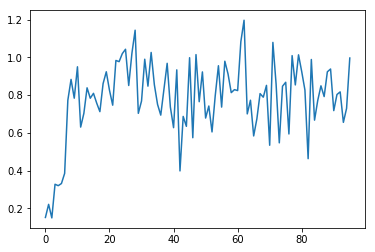

In [496]:
list = []
for i in range(len(RMSEs)):
    list.append(RMSEs[i][0])
    
plt.plot(list)

# カーネルに誤差を考慮させた場合

In [231]:
P = 50
RMSEs = []
RMSEs2 = []
ratio = []

#関数の決定
def func(x):
        y= np.sin(x[0]) + x[1]**2
        return y
    
for p in range(2,P):      #関数に対応して初めを決める


#トレーニングデータの作成　-1<x<1になっている
    N = 100
    X = []
    Y = []
    for i in range(N):    
        x = 2*np.random.rand(p) -1
        X.append(x)
        y = func(X[i]) + 0.2*np.random.rand(1)
        Y.append(y)

    X1 = np.array(X)   
    Y1 = np.array(Y)   


    
#モデルの構築
    import GPy 
    kern = GPy.kern.RBF(p)
    model = GPy.models.GPRegression(X1 ,Y1 ,kernel = kern)
    model.optimize()
    
    kern2 = GPy.kern.RBF(p) + GPy.kern.Bias(p)
    model2 = GPy.models.GPRegression(X1 ,Y1 ,kernel = kern2)
    model2.optimize()

    
#テストデータを作成しつつRMSEの計算
    N = 10
    RMSE = 0
    RMSE2 = 0
    for i in range(N):
        x_test = 2*np.random.rand(p) - 1
        y_test= func(x_test) 
        
        y_pred = model.predict_quantiles(x_test.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
        RMSE += (y_pred - y_test)**2
        
        y_pred2 = model2.predict_quantiles(x_test.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
        RMSE2 += (y_pred2 - y_test)**2
        
    RMSEs.append((RMSE/N)**0.5)
    RMSEs2.append((RMSE2/N)**0.5)
    ratio.append(RMSE2/RMSE)

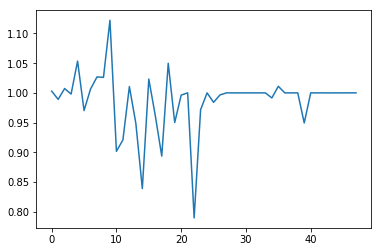

In [229]:
plt.plot(ratio)

# 変数選択の代わりに主成分分析をしてみよう

In [467]:
RMSEs = []
p = 100   #pは変数の数
n_components = 3

#関数の決定
def func(x):
        y= np.sin(x[0]) + x[1]**2
        return y



#トレーニングデータの作成　-1<x<1になっている
N_train = 1000
X = []
Y = []
for i in range(N_train):    
    x = 2*np.random.rand(p) -1
    X.append(x)
    y = func(X[i]) + 0.05*np.random.rand(1)
    Y.append(y)

X1 = np.array(X)   
Y1 = np.array(Y)   

#PCAのデータを作る
pca = PCA(n_components=n_components)
pca.fit(X1)
X_pca = pca.fit_transform(X1)

    
#モデルの構築
import GPy 
kern = GPy.kern.RBF(p)
model = GPy.models.GPRegression(X1 ,Y1 ,kernel = kern)
model.optimize()

kern = GPy.kern.RBF(n_components)
model_pca = GPy.models.GPRegression(X_pca ,Y1 ,kernel = kern)
model_pca.optimize()


    
#テストデータを作成しつつRMSEの計算
N_test = 20
RMSE = 0
RMSE_pca = 0
for i in range(N_test):
    x_test = 2*np.random.rand(p) - 1
    y_test= func(x_test) 
    
    y_pred = model.predict_quantiles(x_test.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
    RMSE += (y_pred - y_test)**2
    
    #PCAしたやつの計算
    x_pca = pca.transform(x_test.reshape(1,-1))
    y_pred_pca = model_pca.predict_quantiles(x_pca.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
    RMSE_pca += (y_pred_pca - y_test)**2


print('元々',(RMSE/N)**0.5, 'PCAしたやつ',(RMSE_pca/N)**0.5)

元々 0.9534378926241194 PCAしたやつ 0.9430881351201862


# 主成分の数をクロスバリデーション

## 主成分の数が多くなるとPCAは関係なくなる

In [469]:
for n_components in range(99):   
    RMSEs = []
    p = 100   #pは変数の数


    #関数の決定
    def func(x):
            y= np.sin(x[0]) + x[1]**2
            return y



    #トレーニングデータの作成　-1<x<1になっている
    N_train = 1000
    X = []
    Y = []
    for i in range(N_train):    
        x = 2*np.random.rand(p) -1
        X.append(x)
        y = func(X[i]) + 0.05*np.random.rand(1)
        Y.append(y)

    X1 = np.array(X)   
    Y1 = np.array(Y)   

    #PCAのデータを作る
    pca = PCA(n_components=n_components)
    pca.fit(X1)
    X_pca = pca.fit_transform(X1)


    #モデルの構築
    import GPy 
    kern = GPy.kern.RBF(p)
    model = GPy.models.GPRegression(X1 ,Y1 ,kernel = kern)
    model.optimize()

    kern = GPy.kern.RBF(n_components)
    model_pca = GPy.models.GPRegression(X_pca ,Y1 ,kernel = kern)
    model_pca.optimize()



    #テストデータを作成しつつRMSEの計算
    N_test = 20
    RMSE = 0
    RMSE_pca = 0
    for i in range(N_test):
        x_test = 2*np.random.rand(p) - 1
        y_test= func(x_test) 

        y_pred = model.predict_quantiles(x_test.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
        RMSE += (y_pred - y_test)**2

        #PCAしたやつの計算
        x_pca = pca.transform(x_test.reshape(1,-1))
        y_pred_pca = model_pca.predict_quantiles(x_pca.reshape(1,-1), quantiles=(2.5, 50, 97.5))[1][0][0]
        RMSE_pca += (y_pred_pca - y_test)**2


    print('元々',(RMSE/N)**0.5, 'PCAしたやつ',(RMSE_pca/N)**0.5)

元々 1.134787985097969 PCAしたやつ 0.9718364403601945
元々 0.8275171212817884 PCAしたやつ 0.8077851905211382
元々 0.8043315895726804 PCAしたやつ 0.8819626819132641
元々 1.0611601932362718 PCAしたやつ 0.8565672274373143
元々 0.8251959896350102 PCAしたやつ 0.8003333271193195
元々 0.7901974151693674 PCAしたやつ 0.7730793246199036
元々 0.7387476965413797 PCAしたやつ 0.9306734413823908
元々 1.0193705846599685 PCAしたやつ 0.9387803311495683
元々 1.105334356497733 PCAしたやつ 0.958990855438128
元々 1.013511594272186 PCAしたやつ 0.6931437187358437
元々 0.8176772144688078 PCAしたやつ 0.7198078542572559
元々 0.9016402069154852 PCAしたやつ 0.8930334750083905
元々 0.9916896731152963 PCAしたやつ 0.7649570032435076
元々 0.9483628976775825 PCAしたやつ 0.8815384941569067
元々 0.7802252105222318 PCAしたやつ 0.6279588026714722
元々 0.7994900300809654 PCAしたやつ 0.6906999029720856
元々 0.8371446646491891 PCAしたやつ 0.6261793642571816
元々 0.9772727591295123 PCAしたやつ 0.740146584761237
元々 0.832697483836107 PCAしたやつ 0.6231072150672765
元々 1.0500871116423545 PCAしたやつ 0.9113784125243323
元々 0.9460778880658038 PCAし